# EFC2 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Alunos**:
- Iago Manoel Brito de Sá Vaz da Silva - 202010135
- Vinícius Caputo de Castro - 202011042

**Turma**: 10A

## Exercício 1

a. O algoritmo encontra em um vetor a mais longa possível sequência de elementos cuja soma seja a mais alta no vetor inteiro.
Como exemplo de aplicação no mundo real, é utilizado para encontrar a região mais clara de uma imagem.

b. Uma sequência de um único elemento: o maior de todos no vetor.

## Exercício 2

a.

Desejamos provar que $T(n) = T(n-1) + n = O(n^2)$.

$ T(n) = O(n^2) $ implica em $T(n) < kn^2$ para $n > n_0$ e qualquer $k > 0$.

$ T(n) = T(n-1) + n < k(n-1)^2 + n $ (pela hipótese)

$ k(n-1)^2 + n = k(n^2 - 2n + 1) + n = kn^2 - 2kn + k + n $

Queremos demonstrar que $T(n) = O(n^2)$, então $ kn^2 - 2kn + k + n < kn^2 $

$ kn^2 - 2kn + k + n < kn^2 \Rightarrow k + n < 2kn \Rightarrow n > -{1 \over {{1 \over k}-2}}$.

Portanto, $T(n) = O(n^2)$ pois sempre existirá $n_0 > -{1 \over {{1 \over k}-2}}$

## Exercício 4

Teorema mestre: Seja $a \ge 1$, $b > 1$ e $k > 0$ constantes
para $T(n) = aT(n/b) + \theta(n^k)$ vale que:

(1) se $a > b^k$, então $T(n) = \theta(n^{\log_b a})$

(2) se $a = b^k$, então $T(n) = \theta(n^k \log n)$

(3) se $a < n^k$, então $T(n) = \theta(n^k)$

**a)** $T(n) = 3T({n \over 2}) + n$

$a = 3,\ b = 2,\ k = 1$

$3 > 2^1 \Rightarrow \theta(n^{\log_2 3})$

**c)** $T(n) = 3T(n/2) + n^{\log_3 2}$

$n < n^{log_3 2} < n^2$

$T'(n) = 3T({n \over 2}) + n$

$a = 3,\ b = 2,\ c = 1$

$3 > 2 \Rightarrow \theta(n^{log_2 3})$

$T''(n) = 3T(n/2) + n^2$

$a = 3,\ b = 2,\ c = 2$

$3 < 4 \Rightarrow \theta(n^2)$

$T'(n) < T(n) < T''(n)$

$T(n)$ é $\Omega(n^{log_2 3})$ e é $O(n^2)$


**d)** $T(n) = T({n \over 2}) + n$

$a = 1,\ b = 2,\ k = 1$

$1 < 2^1 \Rightarrow \theta(n)$

**f)** $T(n) = 2T({n \over 5}) + n$

$a = 2,\ b = 5,\ k = 1$

$2 < 5^1 \Rightarrow \theta(n)$

**g)** $T(n) = 2T(n/2) + cn$

Utilizando árvore de recursão

            n + cn
        n/2        n/2
    n/4    n/4 n/4    n/4

|Nível     |Tamanho         |Nós    |Tempo por nó  |
|----------|----------------|-------|--------------|
| $0$      | $n$            | $1$   | $n$          |
| $1$      | $n \over 2$    | $2$   | $n \over 2$  |
| $2$      | $n \over 4$    | $4$   | $n \over 4$  |
| $i$      | $n \over 2^i$  | $2^i$ | $n \over 2^i$|
|$\lg n$   | $1$            | $n$   | $1$          |

## Exercício 5

a. algoritmo guloso

b. algoritmo guloso

c. programação dinâmica e algoritmo guloso

d. programação dinâmica

e. método incremental

f. divisão e conquista

g. divisão e conquista

h. método incremental

## Exercício 6

O $n$-ésimo número na sequência de Fibonacci é definido como $F(n) = F(n-1) + F(n-2)$, $F(0) = 0$ e $F(1) = 1$.

Uma simples abordagem recursiva para encontrar o $n$-ésimo termo teria tempo de execução $T(n) = T(n-1) + T(n-2) + c_2$, sendo $T(0) = T(1) = c_1$.
Isto é, $T(n) = O(2^n)$.
Calculando os termos recursivamente impede que termos vistos anteriormente sejam reutilizados, causando muitas computações redundantes.

A estratégia de programação dinâmica remedia o problema de várias formas. Para esta questão, escolhemos utilizar memoização, ou seja, reutilizar termos já calculados.
Nesse caso, encontrar o $n$-ésimo termo teria tempo $T(n) = T(n-1) + c_2$, sendo $T(0) = T(1) = c_1$,
então $T(n) = O(n)$.
Encontrar a sequência de Fibonacci do primeiro até o $n$-ésimo termo também teria tempo de execução $T(n)$ por causa da memoização.


## Exercício 7

In [2]:
import matplotlib.pyplot as plt

def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib(n-1) + fib(n-2)

def fibr(n):
    if n < 1:
        return []
    return fibr(n-1) + [fib(n)]

def fibd(n, m=None):
    if m is None:
        m = [0, 1]
    if n == 0 or n == 1: return
    fibd(n-1, m)
    m.append(m[-1] + m[-2])
    return m

def tempo(f, *args):
    import time
    s = time.time()
    f(*args)
    e = time.time()
    return e - s

tamanhos = list(range(1, 33))
tempo_rec = [tempo(fibr, n) for n in tamanhos]
tempo_din = [tempo(fibd, n) for n in tamanhos]

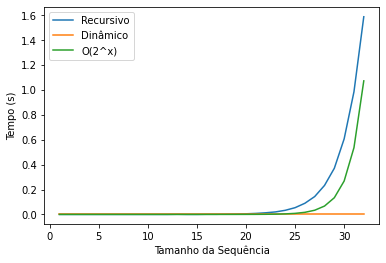

In [3]:
fig, ax = plt.subplots()
ax.set_xlabel('Tamanho da Sequência')
ax.set_ylabel('Tempo (s)')
ax.plot(tamanhos, tempo_rec, label='Recursivo')
ax.plot(tamanhos, tempo_din, label='Dinâmico')
ax.plot(tamanhos, [2**x/4e9 for x in tamanhos], label='O(2^x)')
ax.legend()
